In [6]:
from sage.plot.colors import *
from sage.plot.plot3d.shapes2 import Line, Point

def linePlaneIntersection(lineDir, linePt, planeDir, planePt):
    lineDir = vector(lineDir)
    linePt = vector(linePt)
    planeDir = vector(planeDir)

    return linePt + ((planePt - linePt).dot_product(planeDir)/lineDir.dot_product(planeDir))*lineDir


#### Experimenting with Projecting 4D onto 3D

Lazy implementation, just experimenting with the points.

In [7]:
hypercube_pts = [ 
    vector([1, 1, 1, 1]), vector([-1, 1, 1, 1]), vector([-1, -1, 1, 1]), vector([1, -1, 1, 1]),
    vector([1, 1, -1, 1]), vector([-1, 1, -1, 1]), vector([-1, -1, -1, 1]), vector([1, -1, -1, 1]),
    vector([1, 1, 1, -1]), vector([-1, 1, 1, -1]), vector([-1, -1, 1, -1]), vector([1, -1, 1, -1]),
    vector([1, 1, -1, -1]), vector([-1, 1, -1, -1]), vector([-1, -1, -1, -1]), vector([1, -1, -1, -1])
]

def proj_4d (v, p, W):
    c = p*v[-1] / (p*v[-1] - v[-1])
    
    return vector([x * c for x in v[:-1]]) 

hypercube = None
for i in range(16):
    if i == 15: n_i = 0
    else: n_i = i+ 1
    w = 3
    p = 4
    pt1 = proj_4d(hypercube_pts[i], p, w)
    pt2 = proj_4d(hypercube_pts[n_i], p, w)
    edge = Line([pt1, pt2], color = "blue", thickness = 0.5)
    
    if hypercube == None: hypercube = edge
    else: hypercube += edge

hypercube.show(aspect_ratio = 1, frame = True)

Graphics3d Object

An attempt at plotting the faces (22/24 faces) from the points

In [9]:
hypercube_pts = [ 
    vector([1, 1, 1, 1]), vector([-1, 1, 1, 1]), vector([-1, -1, 1, 1]), vector([1, -1, 1, 1]),
    vector([1, 1, -1, 1]), vector([-1, 1, -1, 1]), vector([-1, -1, -1, 1]), vector([1, -1, -1, 1]),
    vector([1, 1, 1, -1]), vector([-1, 1, 1, -1]), vector([-1, -1, 1, -1]), vector([1, -1, 1, -1]),
    vector([1, 1, -1, -1]), vector([-1, 1, -1, -1]), vector([-1, -1, -1, -1]), vector([1, -1, -1, -1])
]

faces = [
#     [1, 2, 3, 4], # OUTER
#     [5, 6, 7, 8], # OUTER
    [9, 10, 11, 12],
    [13, 14, 15, 16],
    
    [1, 5, 13, 9],
    [2, 6, 14, 10],
    [3, 7, 15, 11],
    [4, 8, 16, 12],
    
#     [1, 2, 6, 5], # OUTER
#     [2, 3, 7, 6], # OUTER
#     [3, 4, 8, 7], # OUTER
#     [4, 1, 5, 8], # OUTER
    
    [9, 10, 14, 13],
    [10, 11, 15, 14],
    [11, 12, 16, 15],
    [12, 9, 13, 16],
    
    [1, 2, 10, 9],
    [2, 3, 11, 10],
    [3, 4, 12, 11],
    [4, 1, 9, 12],
    
    [5, 6, 14, 13],
    [6, 7, 15, 14],
    [7, 8, 16, 15],
    [8, 5, 13, 16],
    
    [1, 2, 10, 9],
    [2, 6, 14, 10], 
#     [6, 5, 13, 14], # REPEATED
#     [5, 1, 9, 13], # REPEATED
    
#     [2, 3, 11, 10], # REPEATED
    [3, 7, 15, 11],
#     [7, 6, 14, 15], # REPEATED
#     [6, 2, 10, 14], # REPEATED (LR)
    
#     [3, 4, 12, 11], # REPEATED
    [4, 8, 16, 12], 
#     [8, 7, 15, 16], # REPEATED
#     [7, 3, 11, 15], #REPEATED (LR)
    
#     [4, 1, 9, 12], # REPEATED
#     [1, 5, 13, 9], # REPEATED
#     [5, 8, 16, 13], # REPEATED
#     [8, 4, 12, 16], # REPEATED (LR)
        
]

# Orthogonal Projection
def proj(v, u):
    # Modify dot_product to implement a different inner product
    return (v.dot_product(u)/u.norm()^2)*u

def projPlane(v, v0, n):
    w = v - v0
    projW = proj(w, n)
    return (w - projW) + v0

frames_orthogonal = []
# frames_perspective = []
for _ in range(18*2):
#     try: 
        eye_pt = vector([0,0,0,10])
        plane_norm = [0,0,0,1]
        plane_pt = vector([0,0,0,18 - _])

        hypercube_ortho = None
#         hypercube_pers = None
        for i in range(16):
            pt_ortho = Point(projPlane(hypercube_pts[i-1], plane_pt, vector(plane_norm))[:-1], 2)
#             pt_pers = Point(linePlaneIntersection(hypercube_pts[i-1] - eye_pt, eye_pt, plane_norm, plane_pt), 2)

            if hypercube_ortho == None: hypercube_ortho = pt_ortho; #hypercube_pers = pt_pers
            else: hypercube_ortho += pt_ortho; #hypercube_pers += pt_pers

        for f in faces:

            face_ortho = polygon([linePlaneIntersection(hypercube_pts[i-1] - eye_pt, eye_pt, plane_norm, plane_pt)[:-1] for i in f], color = blue.lighter(0.5), thickness = 2.0, alpha = 0.7)
#             face_pers = polygon([projPlane(hypercube_pts[i-1], plane_pt, vector(plane_norm))[:-1] for i in f], color = blue.lighter(0.5), thickness = 2.0, alpha = 0.7)
            
            hypercube_ortho += face_ortho
#             hypercube_pers += face_pers

        frames_orthogonal.append(hypercube_ortho)
#         frames_perspective.append(hypercube_pers)
#     except:
#         print(_)
        
# hypercube.show(aspect_ratio = 1, frame = True)
# frames 

I plotted this thinking it would get the resul I wanted, but it makes sense it didn't work since I'm just doing an orthogonal projection and moving the hyperplane through the tesseract.

Animation with 36 frames
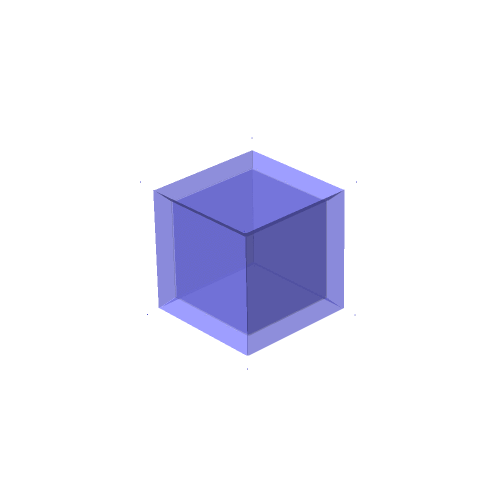

In [10]:
hypercube_projection1 = animate(frames_orthogonal, aspect_ratio = 1, frame = false)
hypercube_projection1.show()

This second attempt involved rotations since I kept reading about the animated projections of hypercubes involving rotations. So, armed with this [thread](https://math.stackexchange.com/questions/1402362/can-rotations-in-4d-be-given-an-explicit-matrix-form), I tried to rotate the cube about different planes. 

In [11]:
# Rotating the tesseract about a hyperplane
def rotMat4D(theta, mode=0):
    
    if mode == 0:
        """xy-axis rotation"""
        return matrix([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, cos(theta), -sin(theta)], [0, 0, sin(theta), cos(theta)]])
    elif mode == 1:
        """yw-axis rotation"""
        return matrix([[cos(theta), 0, -sin(theta), 0], [0, 1, 0, 0], [sin(theta), 0, cos(theta), 0], [0, 0, 0, 1]])
    elif mode == 2:
        """xz-axis rotation"""
        return matrix([[1,0,0,0], [0,cos(theta),0,-sin(theta)], [0,0,1,0], [0,sin(theta),0,cos(theta)]])
    elif mode == 3:
        """yz-axis rotation"""
        return matrix([[cos(theta), 0, 0, -sin(theta)], [0, 1, 0, 0], [0, 0, 1, 0], [sin(theta), 0, 0, cos(theta)]])

In [14]:
def hypercube_frames(ang_start, ang_end, frames, mode=0):
    frames_rot = []
    for ang in sxrange(ang_start, ang_end, ang_end/frames):
    #     try: 
            eye_pt = vector([0,0,0,5])
            plane_norm = [0,0,0,1]
            plane_pt = vector([0,0,0,0])

            hypercube_ortho = None
    #         hypercube_pers = None
            for i in range(16):
                pt_ortho = Point(projPlane(rotMat4D(ang, mode)*hypercube_pts[i-1], plane_pt, vector(plane_norm))[:-1], 2)
    #             pt_pers = Point(linePlaneIntersection(hypercube_pts[i-1] - eye_pt, eye_pt, plane_norm, plane_pt), 2)

                if hypercube_ortho == None: hypercube_ortho = pt_ortho; #hypercube_pers = pt_pers
                else: hypercube_ortho += pt_ortho; #hypercube_pers += pt_pers

            for f in faces:

                face_ortho = polygon([linePlaneIntersection(rotMat4D(ang, mode)*hypercube_pts[i-1] - eye_pt, eye_pt, plane_norm, plane_pt)[:-1] for i in f], color = blue.lighter(0.5), thickness = 2.0, alpha = 0.7)
    #             face_pers = polygon([projPlane(hypercube_pts[i-1], plane_pt, vector(plane_norm))[:-1] for i in f], color = blue.lighter(0.5), thickness = 2.0, alpha = 0.7)

                hypercube_ortho += face_ortho
    #             hypercube_pers += face_pers

            frames_rot.append(hypercube_ortho)
    return frames_rot

Animation with 20 frames
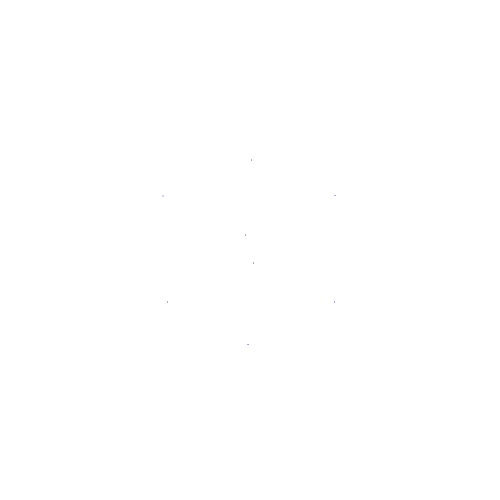

In [15]:
frames_rot1 = hypercube_frames(0, 4*pi, 20, 0)
hypercube_rotating = animate(frames_rot1, aspect_ratio = 1, frame = false)
hypercube_rotating.show(delay=30)

Animation with 20 frames
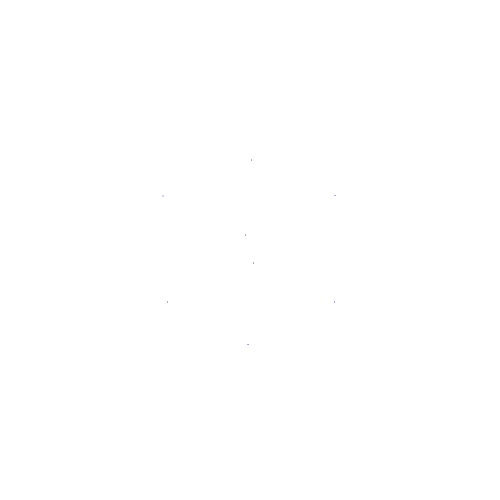

In [16]:
frames_rot2 = hypercube_frames(0, 4*pi, 20, 1)
hypercube_rotating = animate(frames_rot2, aspect_ratio = 1, frame = false)
hypercube_rotating.show(delay=30)

Animation with 20 frames
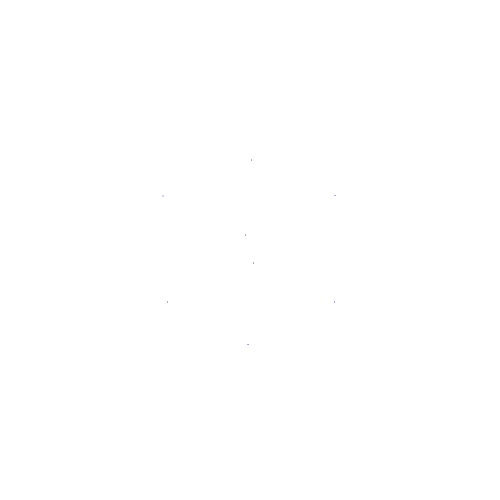

In [17]:
frames_rot3 = hypercube_frames(0, 4*pi, 20, 2)
hypercube_rotating = animate(frames_rot3, aspect_ratio = 1, frame = false)
hypercube_rotating.show(delay=30)

Animation with 20 frames
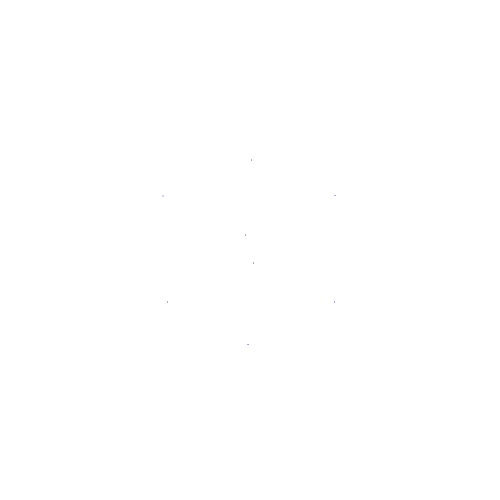

In [18]:
frames_rot4 = hypercube_frames(0, 4*pi, 20, 3)
hypercube_rotating = animate(frames_rot4, aspect_ratio = 1, frame = false)
hypercube_rotating.show(delay=30)

These looked closer to animations I usually see, but I'm sure there are better ways.